# Assignment 3  Bacteria Dynamics

## Learning Objectives
* Implement a stochastic simulation of bacteria population dynamics
* Use inferential statistics to estimate event probabilities
* Plot distribution of values in a set of data

#  Bacteria Dynamics


In this assignment, you will design and implement a stochastic simulation of bacteria population dynamics.  You will spend two weeks on this assignment.  By the end of the assignment, you will reach conclusions about how various random variables affect the spread of the bacteria based on the simulation results.

You should write code based on the provided skeleton in this document (code cells) for the solutions to address each problem in the assignment.



# Background

## Bacteria
Bacteria are single-celled organisms that reproduce asexually. Some bacteria cause diseases, some are harmless, and some are beneficial. Bad bacteria can cause infections such as strep throat and tuberculosis. Bacterial infections are treated with antibiotics targeted to kill only the bad bacterial cells.
Bacteria that cause infections can resist and develop a resilience to antibiotics naturally and/or via use of antibiotics. Thus, populations of bacteria can undergo substantial evolutionary changes within a single patient over the course of treatment. In this assignment, we would like to focus on how populations of bacteria change within a single patient over time.  

## Computational Model
In the assignment problem set, we will implement a highly simplified stochastic model of bacteria population dynamics within a person. Nevertheless, our model exhibits biologically relevant characteristics and will give you a chance to analyze and interpret interesting simulation data.

The document below provides you with some skeleton code you can start with. Please do not change any of the provided skeleton code except to delete # TODO and replace **pass** that follows the comment.  


In [ ]:
#This code is to run the ipynb document at Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Problem 1 Create SimpleBacteria class

The SimpleBacteria class maintains the state of a single bacteria. You will implement the following methods according to the docstring specifications:

```Python
 __init__
 reproduce
 ```

The *is_killed* function actually is complete.  I provide it here for your reference to define the others. Please pay attention to the definition of the function, especially the use of **random.random()** for generating random numbers between 0 and 1.


The skeleton code in the code cells provides you some hints for you to start with.


**Hint**: During debugging, use random.seed(0) before your other random calls.  By this way, all "random" calls will be the same each time you run your file, and so your code will behave the same way each time you run it, which can be useful for debugging purposes.


In [ ]:

##########################
# PROBLEM 1
##########################

class SimpleBacteria(object):
    """A simple bacteria cell with no antibiotic resistance"""

    def __init__(self, birth_prob, death_prob):
        """
        Args:
            birth_prob (float in [0, 1]): Maximum possible reproduction
                probability
            death_prob (float in [0, 1]): Maximum death probability
        """
        self.birth_prob = birth_prob
        pass  # TODO


    def is_killed(self):
        """
        Stochastically determines whether this bacteria cell is killed in
        the patient's body at a time step, i.e. the bacteria cell dies with
        some probability equal to the death probability each time step.

        Returns:
            bool: True with probability self.death_prob, False otherwise.
        """
        #do not change
        if  random.random() <= self.death_prob:
            return True
        else:
            return False

    def reproduce(self, pop_density):
        """
        Stochastically determines whether this bacteria cell reproduces at a
        time step. Called by the update() method in the Patient class.

        The bacteria cell reproduces with probability
        self.birth_prob * (1 - pop_density).

        If this bacteria cell reproduces, then reproduce() creates and returns
        the instance of the offspring SimpleBacteria (which has the same
        birth_prob and death_prob values as its parent).

        Args:
            pop_density (float): The population density, defined as the
                current bacteria population divided by the maximum population

        Returns:
            SimpleBacteria: A new instance representing the offspring of
                this bacteria cell (if the bacteria reproduces). The child
                should have the same birth_prob and death_prob values as
                this bacteria.

            None: None is returned if this bacteria cell does not reproduce.
        """
        pass  # TODO

#some test code could be like
random.seed(0)
birth_prob, death_prob =0.1, 0.05
bacteria = []
for bac in range(100):
    bacteria.append(SimpleBacteria(birth_prob, death_prob))

# Problem 2  Create Patient class

The Patient class maintains the state of a bacterial population associated with a patient. You will
implement the following methods according to the docstring specification:

```Python
__init__
get_total_pop
update
```

For the update function definition, make sure you read the docstring specification and write your code following the steps in the specification.

In [ ]:
##########################
# PROBLEM 2
##########################


class Patient(object):
    """
    Representation of a simplified patient.
    """
    def __init__(self, bacteria, max_pop):
        """
        Args:
            bacteria (list of SimpleBacteria objects): The bacteria in the population
            max_pop (int): Maximum possible bacteria population size for
                this patient
        """
        self.bactorial = bactorial
        #more code
        pass  # TODO

    def get_total_pop(self):
        """
        Gets the size of the current total bacteria population.

        Returns:
            int: The total bacteria population size
        """

        pass  # TODO

    def update(self):
        """
        Update the state of the bacteria population in this patient for a
        single time step. update() should execute the following steps in
        this order:

        1. Determine whether each bacteria cell in the current population dies
           (according to the is_killed method) and create a new list of
           surviving bacteria cells.

        2. Calculate the current population density by dividing the size of
           the surviving bacteria population by the maximum population.
           This population density value is used for the following steps
           until the next call to update()

        3. Based on the population density (step 2), determine whether each surviving
           bacteria cell should reproduce and add offspring bacteria cells to
           a list of bacteria in this patient. New offspring cells do not reproduce.

        4. Reassign the patient's bacteria list to be the list of surviving
           bacteria and new offspring bacteria

        Returns:
            int: The total bacteria population size at the end of the update
        """
        pass  # TODO


#some test code could be here like
#following the previous cell's test code that set bacteria
max_pop = 10000
patient = Patient(bacteria, max_pop)
for step in range(100):
    patient.update()
print(patient.get_total_pop())



In [1]:
l1 = [1, 2, 3]
l2 = [4, 5, 6]
l = l1 + l2
print(l)

[1, 2, 3, 4, 5, 6]


# Problem 3 Running and Analyzing a Single Trial Simulation

In this part you will understand the behavior of a group of bacteria cells as time passes through a simulation. You need to implement the function
  * simulation_singletrial_bacteria
  
  according to the behavior described in the docstring in the below code cell.
  
  
At the end of your simulation_singletrial_bacteria, you need to produce a plot, which should display the bacteria population over time.

Warning: It may take some time to generate the plot especially when your computer system is relatively slow or memory limited. So, please be patient.


In [ ]:
def simulation_singletrial_bacteria(num_bacteria,
                                  max_pop,
                                  birth_prob,
                                  death_prob,
                                   num_steps,
                                   to_plot=False):
    """
    Run a single trial simulation and return a population of bacteria.

    To simulate a single bacteria dynamics, you need to implement below
        * instantiate a list of SimpleBacteria with list size as num_bacteria
        * instantiate a Patient using max_pop and the list of SimpleBacteria
        * simulate changes to the bacteria population for num_steps timesteps,
          recording the bacteria population after each time step. Note
          that the first time step should contain the starting number of
          bacteria in the patient

    Args:
        num_bacteria (int): number of SimpleBacteria to create for patient
        max_pop (int): maximum bacteria population for patient
        birth_prob (float in [0, 1]): maximum reproduction
            probability, used to instantiate a SimpleBacteria object
        death_prob (float in [0, 1]): maximum death probability, used to instantiate a SimpleBacteria object
        num_steps (int): number of time steps updated on patient
        to_plot (bool) : plot the population sizes over the time steps if true
            and not to plot if false


    Returns:
        population (list of numbers of bacteria at time steps): population[j] is the
            size of bacteria population at time step j

    If to_plot is true, plot bacteria population size (y-axis) as a function of
        elapsed time steps (x-axis)

    """
    pass #TODO

random.seed(0)
population = simulation_singletrial_bacteria(100, 10000, 0.2, 0.05, 200, True)
#You could try different arguments for the simulation

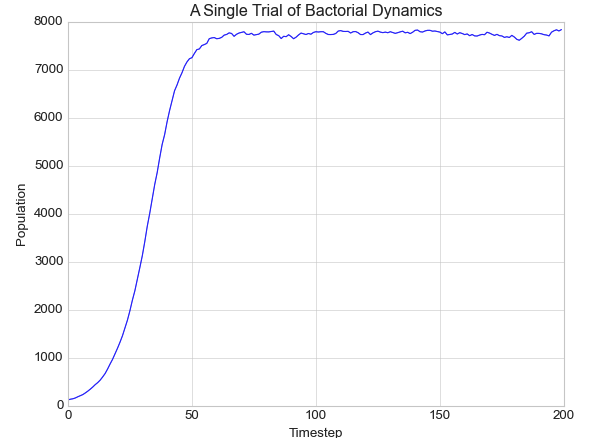

In [ ]:
from IPython.display import Image
Image(filename="/content/drive/MyDrive/APCV361/Assignments/a3/p3.png")

# Problem 4 Running and Analyzing Multiple Trials

In this part you will continually simulate and understand the behavior of a group of bacteria cells as time passes. To address this problem, you need to implement the functions
  * calc_avg_popsize
  * simulation_multitrials_bacteria
  
  according to the behavior described in the docstrings in the provided code.
  
While you must implement *calc_avg_popsize*, you are also **required** to use it while implementing *simulation_multitrials_bacteria*. (That is, you need to call *calc_avg_popsize* in your function definition of *simulation_multitrials_bacteria*.
  
When calling *simulation_multitrials_bacteria*, if to_plot is True, the function implementation produces a plot of your results as well as the populations. The plot should display the average bacteria population over time. You plot the average population across num_trials, so that the resulting curve is smooth and shows a general trend rather than the particular details of any one trial.

Warning: It may take some time to generate the plot especially when your computer system is relatively slow or memory limited.

Hint: simulation_multitrials_bacteria asks you to return a 2D list of populations at each time step for each trial such that populations[i][j] would be the population for the trial i at time step j. This means that if we are running 2 trials for 5 time steps, populations may look something like:
[ [10, 34, 22, 40, 21], [15, 27, 32, 25, 41] ]


In [ ]:
##########################
# PROBLEM 4
##########################

def calc_avg_popsize(populations, n):
    """
    Finds the average bacteria population size across trials at time step n

    Args:
        populations (list of lists or 2D array): populations[i][j] is the
            number of bacteria in trial i at time step j
        n (int): n indicates a time step point

    Returns:
        float: The average bacteria population size at time step n
    """
    pass  # TODO


def simulation_multitrials_bacteria(num_bacteria,
                                  max_pop,
                                  birth_prob,
                                  death_prob,
                                  num_steps,
                                  num_trials,
                                  to_plot=False):
    """
    Run multiple trials of the bactorial dynamics. Hint: for each trial data,
      you could consider using the solution to problem 3.

    For each of the num_trials trials:
        * instantiate a list of SimpleBacteria
        * instantiate a Patient using max_pop and the list of SimpleBacteria
        * simulate changes to the bacteria population for num_steps timesteps,
          recording the bacteria population after each time step. Note
          that the first time step should contain the starting number of
          bacteria in the patient


    Args:
        num_bacteria (int): number of SimpleBacteria to create for patient
        max_pop (int): maximum bacteria population for patient
        birth_prob (float in [0, 1]): maximum reproduction probability
        death_prob (float in [0, 1]): maximum death probability
        num_steps (int): number of time steps updated on the patient
        num_trials (int): number of simulation runs to execute
        to_plot (bool) : plot the population sizes over the time steps if
            true and not to plot if false

    Returns:
        populations (list of lists or 2D array): populations[i][j] is the
            number of bacteria in trial i at time step j

    If to_plot is true, plot the average bacteria population size (y-axis)
    as a function of elapsed time steps (x-axis).

    """
    pass  # TODO

random.seed(0)
populations = simulation_multitrials_bacteria(100, 10000, 0.1, 0.05, 200, 50, True)


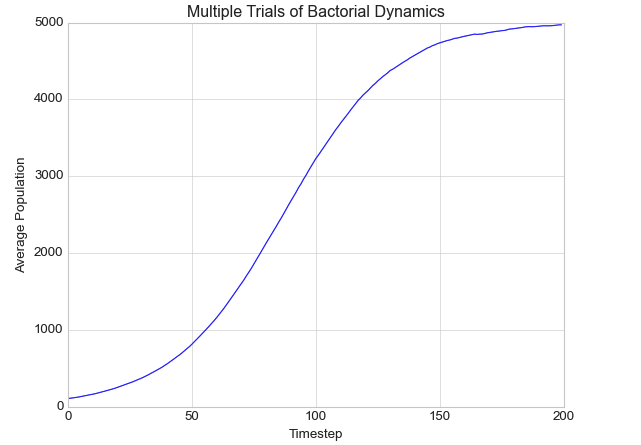

In [ ]:
from IPython.display import Image
Image(filename="/content/drive/MyDrive/APCV361/Assignments/a3/p4.png")

# Problem 5 Reflection

After you finish approaching the above problems, you need to reflect on the learning process.  Below are the questions you need to address in your reflection.  
* What strategies did you use to solve the problems?
* What were the most challenging aspects of this assignment? How did you overcome these challenges? If you couldn’t fully overcome them, what steps did you take to try?
* What are the key takeaways or lessons you learned from this assignment? How do you think the skills and concepts in this assignment might apply to real-world siutations or future projects?

# Turn-in
You need to turn in at least one file for your submission:

* Your notebook file that contains the cells with output presentation

* Any other supplementary documents you want to submit to D2L Assignments folder

You need to package the files into a zip archive and upload the zip file to D2L assignment folder <b>Assignment 3</b>
